## Problem Statement:
The categorization of images into distinct classes is a pervasive task in computer
vision, and it has a wide array of applications, including in pet identification and
animal monitoring systems. In this assignment, we aim to develop a model
capable of accurately distinguishing between cat and dog images. Instead of
building a convolutional neural network (CNN) from scratch, we will leverage
transfer learning using the VGG16 model, a pre-trained model on the ImageNet
dataset. VGG16 is renowned for its effectiveness in image recognition tasks, but
it does not have broad categories for cats and dogs. Therefore, we will utilize the
convolutional (Conv) layers of VGG16 for feature extraction and add custom fully
connected (Cat) layers for the classification task.


## Objectives:
   **Utilize VGG16 for Feature Extraction:**
   
   
  ● Employ the VGG16 model, excluding its top layers, to serve as a feature extractor for cat and dog images.
  
  ● Ensure the input images are of the correct size (150x150) and preprocessed appropriately to match VGG16’s requirements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [101]:
VGG16_base = VGG16(weights = "imagenet", include_top = False, input_shape = (150,150,3))

## Data Preprocessing and Augmentation:
Implement image data generators for real-time data augmentation, ensuring a
robust and varied dataset for training the classification layers.

In [2]:
train_dir = r"E:\Python - Intellipaat_D\Assignment\Deep Learning\Learning From Pre-Built Models – Assignment\training_set"
val_dir = r"E:\Python - Intellipaat_D\Assignment\Deep Learning\Learning From Pre-Built Models – Assignment\Validation_set"

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
        
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [33]:
image, label = next(train_generator)
image.shape, label.shape

((64, 150, 150, 3), (64, 2))

In [34]:
image_val, label_val = next(val_generator)
image_val.shape, label_val.shape

((64, 150, 150, 3), (64, 2))

In [35]:
classes = ["cat", "dog"]

def plot_image(x, y, indices, classes):
    plt.figure(figsize = (10,10)) 
    for i, index in enumerate(range(indices)):
        label = [np.argmax(i) for i in y]
        plt.subplot(5,6,i+1)
        plt.imshow(x[index])
        plt.xlabel(classes[label[index]])
        plt.xticks([])
        plt.yticks([])
    plt.show()

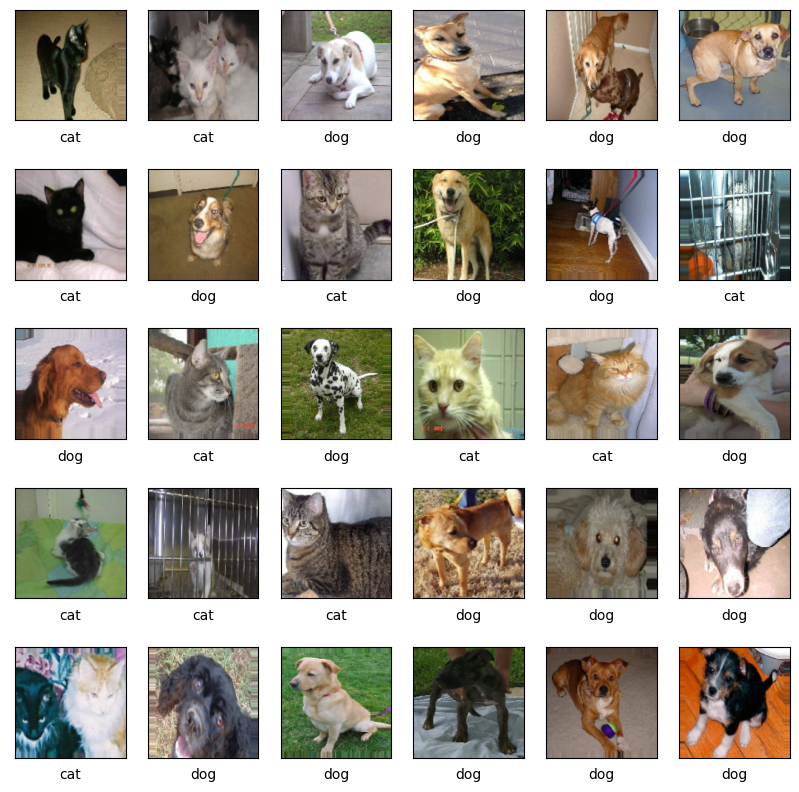

In [36]:
plot_image(image, label, 30, classes)

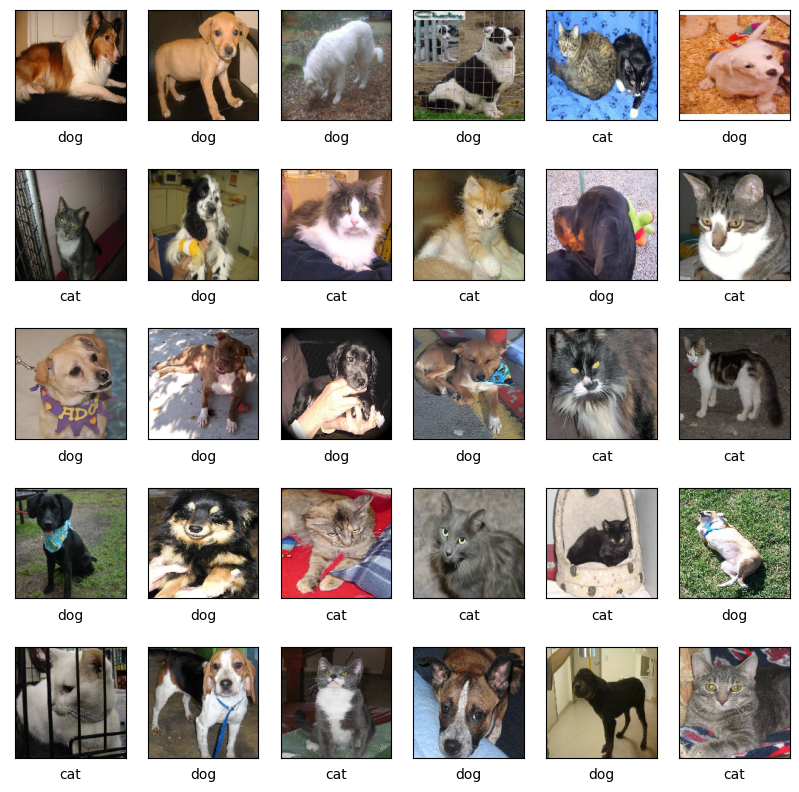

In [37]:
plot_image(image_val, label_val, 30, classes)

In [38]:
train_generator.samples, val_generator.samples

(6404, 1601)

In [39]:
train_generator.batch_size, val_generator.batch_size

(64, 64)

## Build and Train the Classification Model:
● Add custom fully connected layers on top of the VGG16 model for the classification task.

● Freeze the convolutional layers of VGG16 to retain the pre-trained features and only train the added classification layers.

## Model Compilation and Training:
● Compile the model using stochastic gradient descent, categorical cross-entropy as the loss function, and accuracy as the evaluation metric.

● Train the model using the training data, and validate its performance using
a validation set.

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [28]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True )

In [40]:
for layers in VGG16_base.layers:
    layers.trainable = False

model = Sequential([
    VGG16_base,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),    
    keras.layers.Dense(2, activation = "softmax")
])

model.compile( optimizer = keras.optimizers.SGD(),
              loss = "categorical_crossentropy",
               metrics = ["accuracy"])

history = model.fit(train_generator, 
                    steps_per_epoch=None,
                    validation_data = val_generator,
                    validation_steps= None,
                    epochs = 20,
                    callbacks = [reduce_lr, early_stopping]
                    )

Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 597s 6s/step - accuracy: 0.6122 - loss: 0.7183 - val_accuracy: 0.7720 - val_loss: 0.4546 - learning_rate: 0.0100
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 600s 6s/step - accuracy: 0.7945 - loss: 0.4444 - val_accuracy: 0.8457 - val_loss: 0.3577 - learning_rate: 0.0100
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 609s 6s/step - accuracy: 0.8058 - loss: 0.4176 - val_accuracy: 0.8726 - val_loss: 0.3026 - learning_rate: 0.0100
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 608s 6s/step - accuracy: 0.8478 - loss: 0.3448 - val_accuracy: 0.6646 - val_loss: 0.7380 - learning_rate: 0.0100
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 617s 6s/step - accuracy: 0.8449 - loss: 0.3537 - val_accuracy: 0.8857 - val_loss: 0.2777 - learning_rate: 0.0100
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 611s 6s/step - accuracy: 0.8458 - loss: 0.3361 - val_accuracy: 0.8651 - val_loss: 0.3110 - learning_rate: 0.0100
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 608s 6s/step - accuracy: 0.8600 - loss: 0.

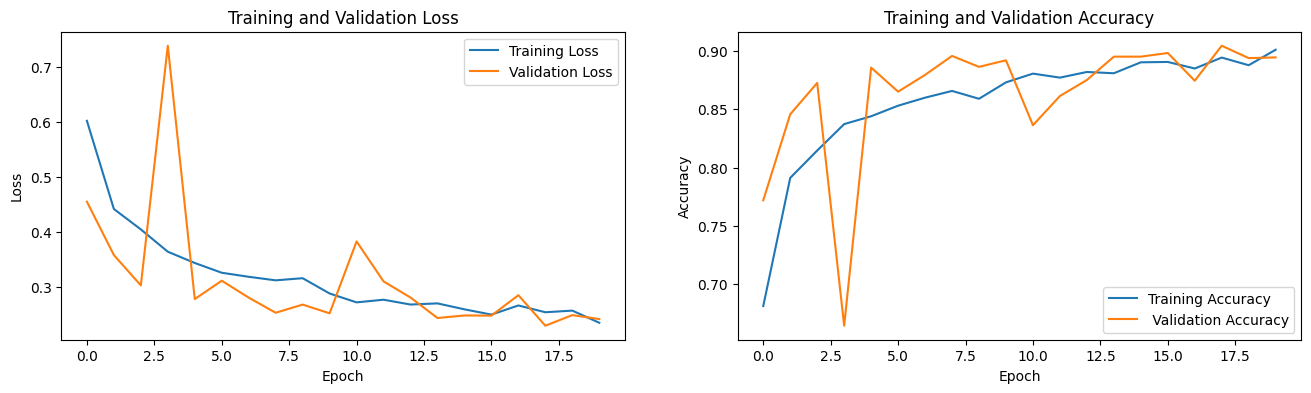

In [41]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = " Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

## Evaluate and Test the Model:
● Assess the model’s performance based on its accuracy in classifying images into cat or dog categories.

● Implement a prediction function to classify new images, providing the predicted category and the associated confidence level.

In [42]:
test_dir = r"E:\Python - Intellipaat_D\Assignment\Deep Learning\Learning From Pre-Built Models – Assignment\test_set"

In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 2023 images belonging to 2 classes.


In [44]:
test_img, test_labels = next(test_generator)

In [50]:
y_pred = model.predict(test_img)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


array([[2.01441906e-02, 9.79855776e-01],
       [9.59767044e-01, 4.02328670e-02],
       [4.84873913e-02, 9.51512694e-01],
       [9.47589695e-01, 5.24102524e-02],
       [1.34634608e-02, 9.86536562e-01],
       [2.81043141e-03, 9.97189581e-01],
       [1.78223714e-01, 8.21776211e-01],
       [4.23003919e-04, 9.99576986e-01],
       [6.02827349e-04, 9.99397159e-01],
       [8.11357319e-01, 1.88642710e-01],
       [3.99326608e-02, 9.60067391e-01],
       [9.85253513e-01, 1.47465263e-02],
       [4.34200875e-02, 9.56579924e-01],
       [2.61447251e-01, 7.38552690e-01],
       [9.98387933e-01, 1.61204243e-03],
       [9.92669225e-01, 7.33075850e-03],
       [1.35534944e-03, 9.98644650e-01],
       [6.42685592e-02, 9.35731471e-01],
       [9.98388052e-01, 1.61201949e-03],
       [9.94615734e-01, 5.38429990e-03],
       [2.07407489e-01, 7.92592525e-01],
       [1.52707160e-01, 8.47292900e-01],
       [2.40623187e-02, 9.75937665e-01],
       [9.95787442e-01, 4.21252241e-03],
       [1.045926

In [54]:
y_prediction = [np.argmax(i) for i in y_pred]
y_prediction[0:5]

[1, 0, 1, 0, 1]

In [55]:
y_true = [np.argmax(i) for i in test_labels]
y_true[0:5]

[1, 0, 1, 0, 1]

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_prediction ))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.92      0.87      0.89        39

    accuracy                           0.88        64
   macro avg       0.87      0.88      0.87        64
weighted avg       0.88      0.88      0.88        64



# Prediction using a batch of images from the internet :

In [57]:
model_save_path = r"E:\Python - Intellipaat_D\Assignment\Deep Learning\Learning From Pre-Built Models – Assignment\Final_model.h5"
model_save_path

'E:\\Python - Intellipaat_D\\Assignment\\Deep Learning\\Learning From Pre-Built Models – Assignment\\Final_model.h5'

In [58]:
model.save(model_save_path)

In [59]:
from tensorflow.keras.models import load_model
model.vgg16 = load_model(model_save_path)
model.vgg16

<Sequential name=sequential_4, built=True>

In [92]:
path = pathlib.Path(r"E:\Python - Intellipaat_D\Assignment\Deep Learning\Learning From Pre-Built Models – Assignment\For_prediction")
path

WindowsPath('E:/Python - Intellipaat_D/Assignment/Deep Learning/Learning From Pre-Built Models – Assignment/For_prediction')

In [93]:
images = os.listdir(path)
images

['funny-portrait-of-cute-corgi-dog-outdoors-free-photo.jpg',
 'gettyimages-114166947-1-268128f97e5c415baede328c1fe32f55.jpg',
 'pexels-kerber-774731.jpg',
 'pexels-pixabay-45201.jpg',
 'pexels-tranmautritam-2194261.jpg',
 'Screenshot 2024-05-15 183313.jpg',
 'Screenshot 2024-05-24 152115.jpg',
 'zhang-kaiyv-ECfPmkOVZPA-unsplash.jpg']

In [94]:
new_imgs = []
for img in os.listdir(path):
    img = os.path.join(path,img)
    image = load_img(img, target_size = (150,150))
    image_array = img_to_array(image)
    image_array = image_array.reshape(150,150,3)
    new_imgs.append(image_array)

In [95]:
new_imgs = np.array(new_imgs)
new_imgs = new_imgs/255
new_imgs

array([[[[0.33333334, 0.31764707, 0.27058825],
         [0.3372549 , 0.32156864, 0.2784314 ],
         [0.34509805, 0.32941177, 0.29411766],
         ...,
         [0.15686275, 0.15686275, 0.15686275],
         [0.16470589, 0.16470589, 0.16470589],
         [0.17254902, 0.17254902, 0.17254902]],

        [[0.34509805, 0.32941177, 0.28235295],
         [0.34117648, 0.3254902 , 0.28235295],
         [0.34117648, 0.3254902 , 0.2901961 ],
         ...,
         [0.16470589, 0.16470589, 0.16470589],
         [0.1764706 , 0.1764706 , 0.1764706 ],
         [0.18039216, 0.18039216, 0.18039216]],

        [[0.3529412 , 0.3372549 , 0.2901961 ],
         [0.34117648, 0.3254902 , 0.28235295],
         [0.3372549 , 0.32156864, 0.28627452],
         ...,
         [0.16470589, 0.16470589, 0.16470589],
         [0.16470589, 0.16470589, 0.16470589],
         [0.17254902, 0.17254902, 0.17254902]],

        ...,

        [[0.30588236, 0.43529412, 0.2509804 ],
         [0.35686275, 0.48235294, 0.2901961 ]

In [96]:
new_imgs[6]

array([[[0.2       , 0.3529412 , 0.18039216],
        [0.19607843, 0.3372549 , 0.1882353 ],
        [0.19607843, 0.3372549 , 0.19607843],
        ...,
        [0.20392157, 0.30588236, 0.16078432],
        [0.18431373, 0.27450982, 0.16078432],
        [0.19215687, 0.28235295, 0.16862746]],

       [[0.25490198, 0.4117647 , 0.21568628],
        [0.24313726, 0.3882353 , 0.21568628],
        [0.21176471, 0.35686275, 0.19607843],
        ...,
        [0.21960784, 0.32156864, 0.1764706 ],
        [0.1764706 , 0.27450982, 0.15686275],
        [0.1764706 , 0.27450982, 0.15686275]],

       [[0.27450982, 0.43137255, 0.22352941],
        [0.2627451 , 0.4117647 , 0.21960784],
        [0.24313726, 0.3882353 , 0.21568628],
        ...,
        [0.23921569, 0.34117648, 0.20392157],
        [0.19607843, 0.29411766, 0.18039216],
        [0.16862746, 0.26666668, 0.15294118]],

       ...,

       [[0.91764706, 0.8352941 , 0.8156863 ],
        [0.8980392 , 0.8156863 , 0.8117647 ],
        [0.85490197, 0

In [97]:
new_img_pred = model.vgg16.predict(new_imgs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


In [98]:
y_predicted_new = [np.argmax(i) for i in new_img_pred]
y_predicted_new

[1, 1, 0, 0, 1, 1, 1, 0]

In [89]:
classes = ["cat", "dog"]

def plot_pred_image(x, y, indices, classes):
    plt.figure(figsize = (10,10)) 
    for i, index in enumerate(range(indices)):
        plt.subplot(5,6,i+1)
        plt.imshow(x[index])
        plt.xlabel(classes[y[index]])
        plt.xticks([])
        plt.yticks([])
    plt.show()

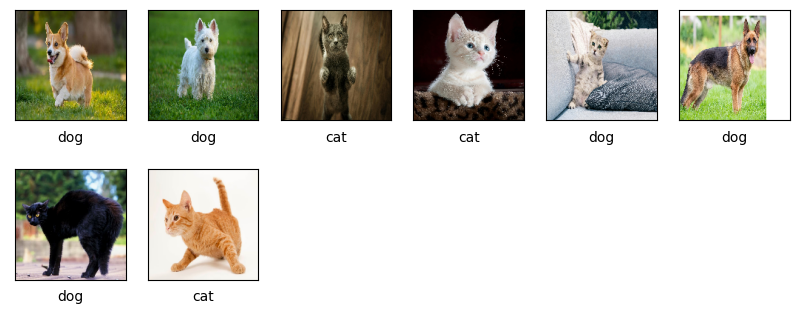

In [100]:
plot_pred_image(new_imgs, y_predicted_new, 8, classes)